### A/B Testing

This notebook describes in simple terms the design and analysis of A/B testing  

**Business applications**

If you're running a business that takes online orders, you would likely want to understand if your webpage design is helping you reach your business outcomes. Measuring your results using A/B testing is the best way to find the answers to these type of questions. 


In [13]:
#imports

import scipy
from scipy import stats
import scipy.stats as scs
from scipy.stats import bernoulli
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

## Business Problem


A company decides to create a new version of their webpage in order to increase the number of people signing for their services through their website - simple alternatives such as: changing the look of a single button on a webpage or different layouts and headlines, etc. 

To determine which version of the webpage is more effective we will use A/B testing.

A/B testing are randomized experiment with 2 variants, A and B using two-sample statistical hypothesis testing that allows to explain the outcomes. 


## Set up the experiment


The company shows 1,000 people the old webpage (control group, denoted A) and to another 1,000 people the new webpage (test group, denoted B). It uses randomzed selection and assignment into the two groups. For example, when someone visits their website the site sends them to one of the two (A/B) webpages, and which one they are sent to is chosen at random.

**Data summary**

In [8]:
df = pd.DataFrame({
    'group': ['A', 'B'],
    'total': [1000, 1000],
    'converted': [490, 510]
})[['group', 'total', 'converted']]

df

,group,total,converted
0,A,1000,490
1,B,1000,510


In [10]:
df["rate"] = df["converted"]/1000

df

,group,total,converted,rate
0,A,1000,490,0.49
1,B,1000,510,0.51


The estimated difference in success rates is given by the difference in proportions: 

 - d_AB = p_B - p_A = 51 -49 = 2 %

The observed difference between the two groups suggests that the new version converts better than the current one and we could go ahead with the new design. 

But, in order to make robust inferences based on a single sample requires the use of statistical testing.

## Understanding first the distribution of our data 


The distribution for each group A/B is a series of **Bernoulli trials**, where each trial has two possible outcomes 0 and 1 (1 converted, 0=not converted).


#### The mean of Bernoulli distributions

The expected value of Bernoulli random variables for groups A/B: 

E(X_A) = p_A * 1 + (1-p_A) * 0 = p_A

E(X_B) = p_B * 1 + (1-p_B) * 0 = p_B

The sample mean is the maximum likelihood estimator of p based on a random sample.

For each group A and B, the signing up rates
**p_A and p_N are the sample means.**

#### The variance of Bernoulli distributions

var_A = p_A*(1-p_A)

var_B = p_B*(1-p_B)



#### Sample means estimates of the true mean

A natural question is as follows: how accurate is the observed difference in sample means?

The average of such estimates over many datasets will be very close to the true value, but a single estimate may be a substantial underestimate or overestimate of it.

How far off will the estimate of p_A or p_B be from the true mean? 
In general, we answer this question by computing the standard error.

#### Standard deviations of the sample means

For samples larger than 30, the distribution of the sample means is approximately normally distributed around the true mean with a standard deviation equal to the standard error of the mean.

## Statistical inference

We want to determine if the differences in signing up rates between A and B were statistically significant (that is, highly likely that the differences are real, repeatable, and not due to random chance).

Suppose the contrary is true i.e., assume the null hypthesis H0: "The two wepages'true success rates are equal." is true.

### H0: p_A =  p_B   <= >  d_AB = 0


Gather evidence to disprove the H0 hypothesis.

#### Drawing two random samples: 

We draw the random samples A and B from a normal distribution with the same variance and differing means of 49 and 51 respectively. 

We will expect the test to reject the null hypothesis and find a significant difference between the samples:

In [11]:
# seed the random number generator
np.random.seed(123)

# generate two independent samples

p_A, p_B = 49, 51 # sample means 

sigma = 5 # standard deviation

dataA = np.random.normal(p_A, sigma, 1000)

dataB = np.random.normal(p_B, sigma, 1000)

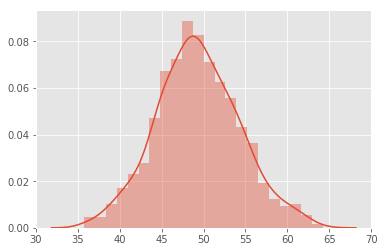

In [14]:
#Visualize the data

valueA = np.random.normal(loc=49,scale=5,size=1000)

sns.distplot(valueA)


Verify the mean and the variance:

In [15]:
abs(p_A - np.mean(dataA)) < 5

True

In [16]:
abs(p_B - np.mean(dataB)) < 5

True

In [17]:
meanA = dataA.mean(axis=0)
meanB = dataB.mean(axis=0)
print([meanA,meanB])

[48.80217931959604, 51.041945836979366]


In [18]:
# calculate sample standard deviations
s1, s2 = np.std(dataA, ddof=1), np.std(dataB, ddof=1)
print([s1,s2])

[5.00644153446669, 4.792444597365098]


In [19]:
# calculate standard errors
n1, n2 = len(dataA), len(dataB)
se1, se2 = s1/np.sqrt(n1), s2/np.sqrt(n2)
print([se1,se2])

[0.15831758221383116, 0.15155040487842295]


In [20]:
# Alternalively we can calculate se directly

se1, se2 = scipy.stats.sem(dataA), scipy.stats.sem(dataB)
print([se1,se2])

[0.15831758221383116, 0.15155040487842295]


### Analysis of variance (ANOVA)


The problem of analysing the differences d_AB = p_B - p_A in signing up rates p_A and p_B between the two groups reduces to the analysis of variance of the differences among A/B group means in a sample.

The analysis of variance has the following assumptions about the probability distribution of the responses:

- Independence of observations – this is an assumption of the model that simplifies the statistical analysis.

- Equality (or "homogeneity") of variances or homoscedasticity — the variance of data in groups is the same.

- Normality assumption implies that statistical errors are independently, identically and normally distributed around zero with a standard deviation equal to the standard error of the mean.

Generally, ANOVA is difficult to teach, however in our case, where we used a randomzied balanced experimental design where the two groups A and B have the same number of observations, the randomization-based analysis reduces to t-statistical testing.


T-tests are used effectively when estimating the mean of a normally distributed population in situations where the population standard deviation is unknown.

###  Independent 2-samples t-test


Using the t-test to assess the statistical significance of the difference between the two sample means p_A and p_B.

The t-test allows to assign a probability level to describe the likelihood that H0 is true. 





#### t-distribution


Under H0 assumption and n large we expect that the t-stats will have a t-distribution with N − 2 = 1998 degrees of freedom.

Text(0.5, 1.0, 'PDF for t distribution with df=N_A + N_B - 2')

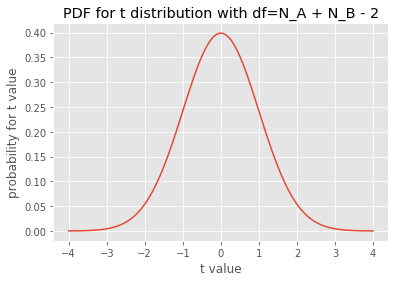

In [28]:
t_dist = scipy.stats.t(1998)

t_values = np.linspace(-4, 4, 100)
plt.plot(t_values, t_dist.pdf(t_values))

plt.xlabel('t value')
plt.ylabel('probability for t value')
plt.title('PDF for t distribution with df=N_A + N_B - 2')


#### T-statistics 

 measures the number of standard deviations the difference in signup rates is away from 0

- t = (p_A - p_B) /s_pooled

The denominator of t is the standard error of the difference between two means p_A and p_B

- se_pooled = np.sqrt(var_pooled)*np.sqrt(2/N_A) 

where var_pooled is the pooled variance.


In [22]:
#We can calculate the t statistic directly:

t_stats, p_value = stats.ttest_ind(dataA, dataB)
print([t_stats, p_value])

[-10.219684624829402, 6.2094257811600204e-24]


In [23]:
#We can also specify non equal variance:

stats.ttest_ind(dataA, dataB, equal_var = False)

Ttest_indResult(statistic=-10.219684624829402, pvalue=6.224826345285404e-24)

In [24]:
# Alternatively, we can calculate the t statistic manually

# standard error on the difference between the samples
sed = np.sqrt(se1**2.0 + se2**2.0)

t_stat = (meanA - meanB) / sed
print(t_stat)

-10.219684624829402


##### p-value


To estimate the p-value manualy it is a simple matter of computing the probability of observing any value equal to |t| or larger, assuming that H0 is true. Then consult a t-table or t-calculator http://www.ttable.org/student-t-value-calculator.html

In general, if t-statistics is large and the p-value small, the likelihood of seeing such values of the estimates if H0 is true (ie due to chance) are virtually zero.



Typical p-value cutoffs for rejecting the null hypothesis are 5 or 1%.

In [25]:
# interpret via p-value

alpha = 0.01
if p_value > alpha:
    print('Accept null hypothesis that the two wepages true success rates are equal.')
else:
    print('Reject the null hypothesis that the two wepages true success rates are equal.')

Reject the null hypothesis that the two wepages true success rates are equal.



### Interpretation:

Because this likelihood (calculated using the t-test p-value)  is smaller than 0.01, we reject H0 and infer that the observed difference in signup rates is real with a confidence of 99%. For all intents and purposes this is a pretty reliable test.

### Summary

Using A/B testing we were able to make statistical inferences about the differences in signups for variations in the webpage design based on two samples. 
